In [21]:
import warnings;
warnings.filterwarnings('ignore');
import os
os.environ["DISABLE_MPI"]="1"
os.environ["OMP_NUM_THREADS"]="3"

In [22]:
!echo $PYTHONPATH

/opt/ovis/lib/python2.7/site-packages


In [23]:
import numpy as np
from pixell import enmap, utils, enplot, colorize, reproject
import glob as gl
import pylab as plt
import healpy as hp

In [41]:
from matplotlib.colors import ListedColormap
colombi1_cmap = ListedColormap(np.loadtxt("data/Planck_Parchment_RGB.txt")/255.)
colombi1_cmap.set_bad("lightgrey") # color of missing pixels
colombi1_cmap.set_under("white") # color of background, necessary if you want to use
# this colormap directly with hp.mollview(m, cmap=colombi1_cmap)
cmap = colombi1_cmap

In [25]:
release_path = '/global/cfs/projectdirs/act/data/20191125_actpol_dr4/'

In [26]:
dust = enmap.read_map("data/planck_353_small.fits")
footprint2 = enmap.zeros(dust.shape[1:],dust.wcs)
del dust

In [27]:
paths = gl.glob(release_path+'/maps/s16/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 1


paths = gl.glob(release_path+'/maps/s15/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 2
        
    
paths = gl.glob(release_path+'/maps/s13/*f150*coadd*ivar*')
footprint = enmap.zeros(footprint2.shape,footprint2.wcs)
for i, path in enumerate(paths):
    foot  = enmap.read_map(path)
    foot[foot!=0] = 1
    down = utils.nint(footprint.wcs.wcs.cdelt[1]/foot.wcs.wcs.cdelt[1])
    foot = enmap.downgrade(foot,down)
    footprint += enmap.project(foot, footprint.shape, footprint.wcs, order=0)
footprint2[footprint!=0] += 1

  4.80   0.01 read 
  4.80   0.05 ranges
  4.80 color range 0:  1.00000e+00 to   4.0000000e+00
  4.80   0.03 1/1 colorize
  4.80   0.00 1/1 to image
  4.80   0.00 1/1 stack layers
  4.80 padded by 0 0 0 0


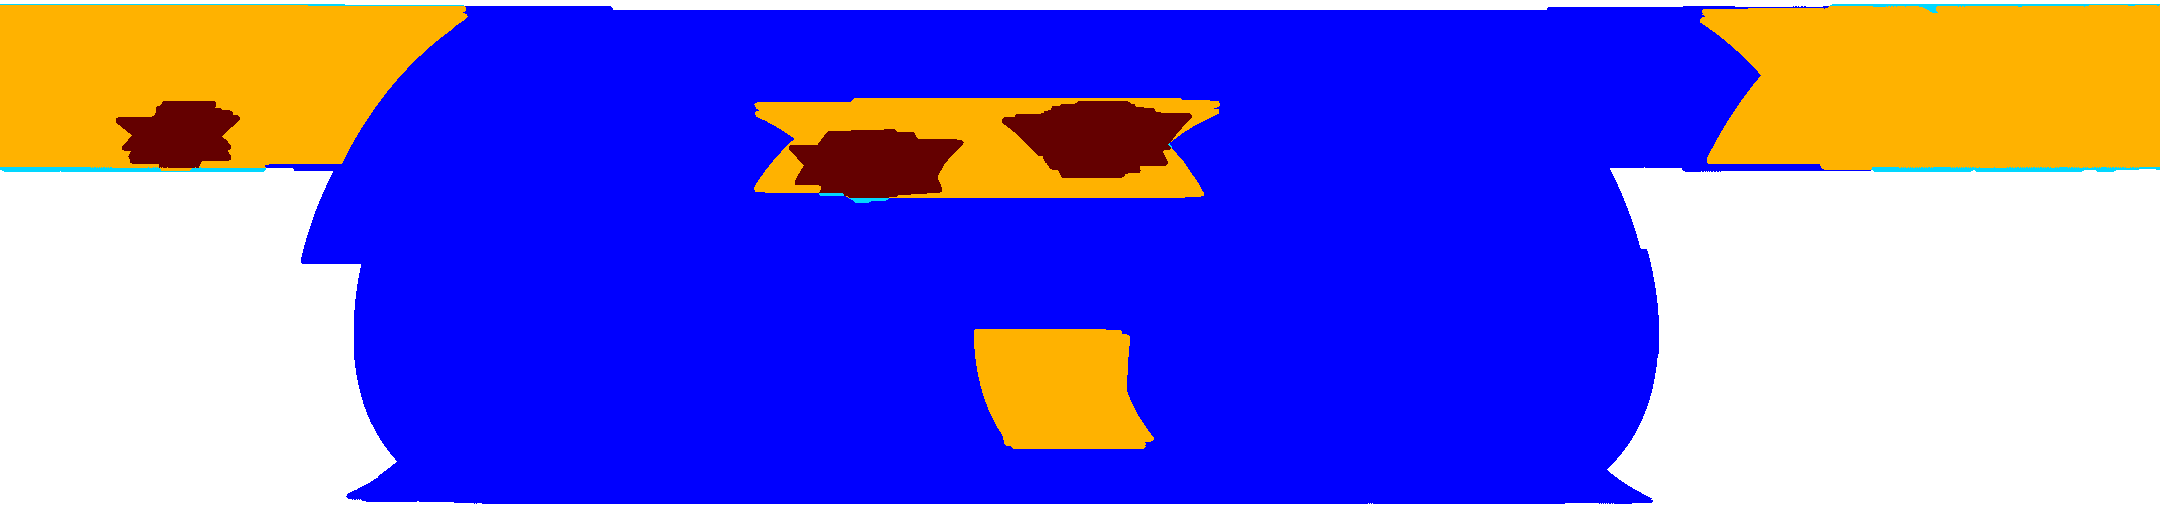

In [28]:
pl = enplot.plot(footprint2,mask=0,grid=False,verbosity=10)
enplot.show(pl)

In [29]:
maskhp = footprint2.to_healpix(nside=512, order=0)

In [30]:
maskhp[maskhp==0]=hp.UNSEEN

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


Text(-0.21384290836414835, -0.2720147302681235, 'AA')

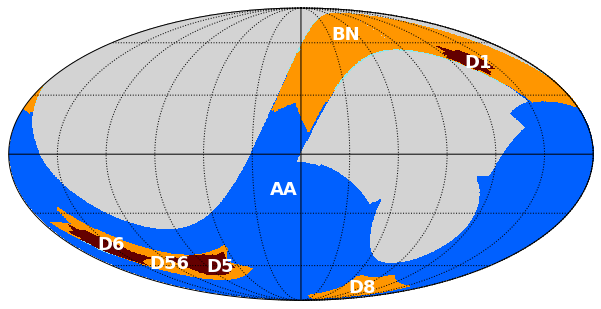

In [43]:
hp.mollview(maskhp,title='',cmap=colombi1_cmap,cbar=False,coord=['E','G'],min=0.5,max=4,badcolor='lightgrey',notext=True,xsize=1500)
hp.graticule()
hp.projtext(-30., 62.,  'BN', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(-125., 45., 'D1', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(-90., -80,  'D8', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(165., -50,  'D6', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(98., -64,   'D5', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(150., -62, 'D56', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")
hp.projtext(20., -20,   'AA', lonlat=True, coord='G',size=18,fontweight='heavy',color="white")